# Preparación del entorno

In [1]:
## Imports
import sqlalchemy as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
## Parámetros de base de datos
db_username = os.getenv('DB_USERNAME')
db_password = os.getenv('DB_PASSWORD')
db_name = os.getenv('DB_NAME')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_table_prefix = 'data'
db_table_metadata = 'metadata'

In [3]:
## Parámetros de gráficos
bargraph_ylim = (12, 40)
heatmap_years = years=[*range(1968, 2024)]

In [4]:
## Definición de funciones
def fetch_data_for_year(year, column):
    engine = sql.create_engine(f'mysql+pymysql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')
    table = db_table_prefix + str(year)
    query = f'select * from {table}'
    df = pd.read_sql_query(con=engine.connect(), sql=sql.text(query))
    df = df[['fecha', column]]
    df[column] = df[column].str.replace(',', '.')
    df['month'] = df.fecha.apply(lambda x: x[5:7])
    df["month"] = pd.to_numeric(df["month"])
    df[column] = pd.to_numeric(df[column])
    df["year"] = year
    df = df.drop(columns=["fecha"])
    return df

def draw_bargraph_for_years(df):
    bar_graph = sns.barplot(x='month', y='tmax', data=df, capsize = 0.25, hue="year")
    plt.ylabel("Temperatura Máxima")
    plt.xlabel("Mes")
    bar_graph.set(ylim=bargraph_ylim)

# Recuperación de datos

In [ ]:
## Recuperación de datos desde base de datos 

# Temperaturas máximas
tmaxFromDb = pd.DataFrame(columns=["tmax", "month", "year"])

for year in heatmap_years:
    df_aux = fetch_data_for_year(year, "tmax")
    tmaxFromDb = pd.concat([tmaxFromDb, df_aux], ignore_index=True)

# Temperaturas mínimas
tminFromDb = pd.DataFrame(columns=["tmin", "month", "year"])

for year in heatmap_years:
    df_aux = fetch_data_for_year(year, "tmin")
    tminFromDb = pd.concat([tminFromDb, df_aux], ignore_index=True)

# Mapas de calor

## Temperaturas máximas

In [6]:
## Limpieza y prepración de los datos

meanTmaxMonthYear = pd.DataFrame(columns=["tmax", "month", "year"])

for year in heatmap_years:
    for month in range(1, 13):
        df_aux = tmaxFromDb[(tmaxFromDb['year'] == year) & (tmaxFromDb['month'] == month)]
        meanTmaxMonthYear.loc[len(meanTmaxMonthYear.index)]=(df_aux.mean().tmax, month, year)
        meanTmaxMonthYear["month"] = meanTmaxMonthYear["month"].astype(int)
        meanTmaxMonthYear["year"] = meanTmaxMonthYear["year"].astype(int)


meanTmaxMonthYear = meanTmaxMonthYear.pivot(index="month", columns="year", values="tmax")

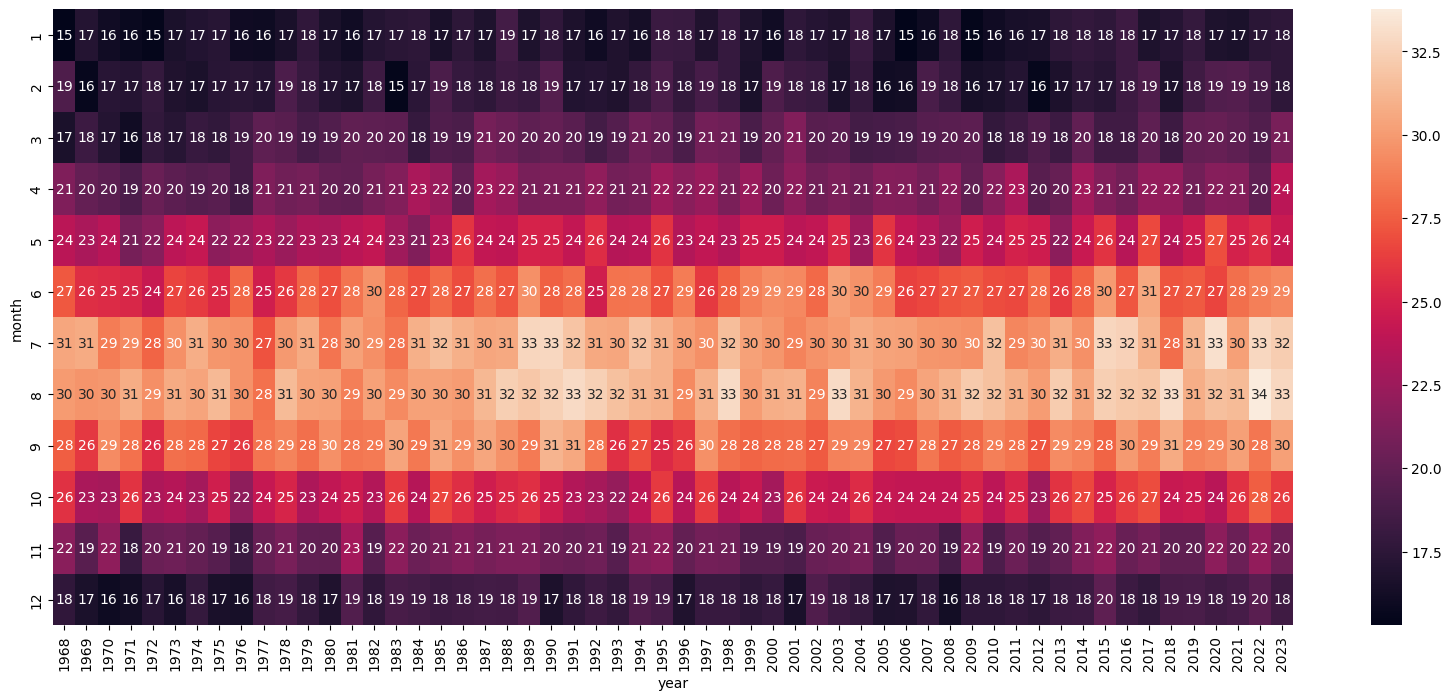

In [7]:
## Generación del gráfico

plt.figure(figsize = (20,8))
sns.heatmap(meanTmaxMonthYear, annot = True)
plt.show()

## Tempraturas mínimas

In [8]:
## Limpieza y prepración de los datos

meanTmaxMonthYear = pd.DataFrame(columns=["tmin", "month", "year"])

for year in heatmap_years:
    for month in range(1, 13):
        df_aux = tminFromDb[(tminFromDb['year'] == year) & (tminFromDb['month'] == month)]
        meanTmaxMonthYear.loc[len(meanTmaxMonthYear.index)]=(df_aux.mean().tmin, month, year)
        meanTmaxMonthYear["month"] = meanTmaxMonthYear["month"].astype(int)
        meanTmaxMonthYear["year"] = meanTmaxMonthYear["year"].astype(int)


meanTmaxMonthYear = meanTmaxMonthYear.pivot(index="month", columns="year", values="tmin")

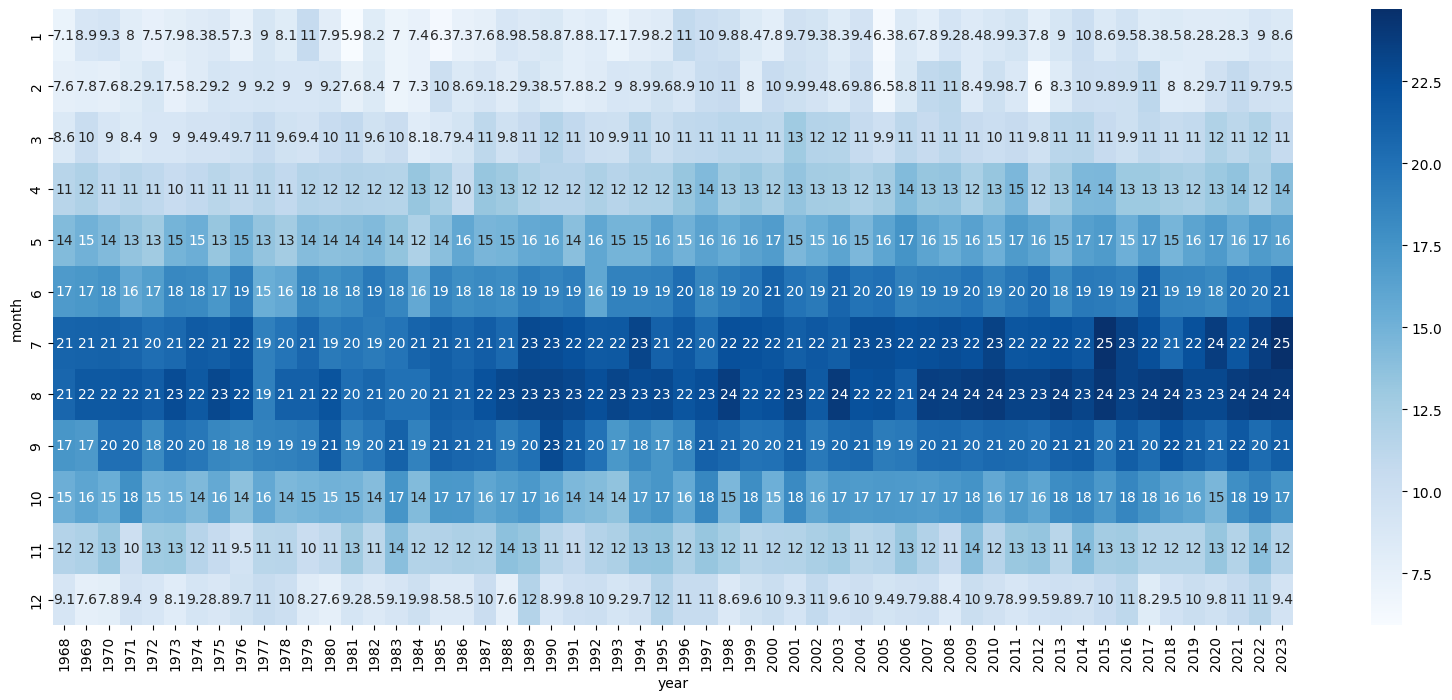

In [9]:
## Generación del gráfico

plt.figure(figsize = (20,8))
sns.heatmap(meanTmaxMonthYear, annot = True, cmap='Blues')
plt.show()